In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

git_link = 'https://github.com/geojoseph19/FakeFinder/raw/master/Datasets/Combined/insta_dataset.csv'
data = pd.read_csv(git_link)

X = data.drop('fake', axis=1)
y = data['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# make a prediction on the test data
y_pred = knn.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9071428571428571


In [2]:
with open('knn_model.pkl', 'rb') as f:
    knn_loaded = pickle.load(f)
    
pdata = [[1, 0.0, 2, 0.0, 0, 148, 0, 0, 6, 39, 12]]

# create a dataframe with the input data and set the column names to match the training data
new_data = pd.DataFrame(pdata, columns=X.columns)

# make a prediction using the modified input data
prediction = knn_loaded.predict(new_data)
print(prediction)


[1]


              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.89      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



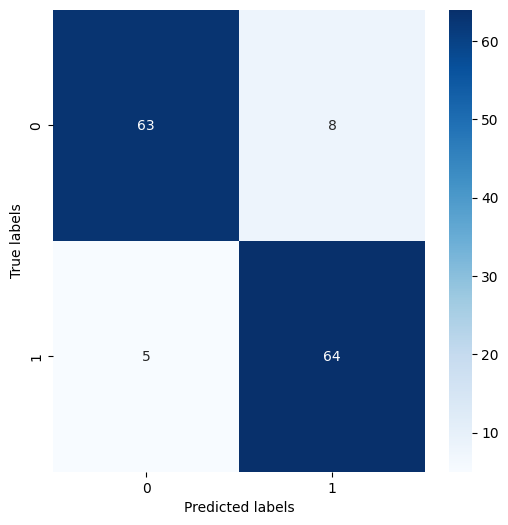

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# generate the classification report
print(classification_report(y_test, y_pred))

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [39]:
# Define binary variables
x = 1
y = 0
z = 1

# Convert binary to decimal
x_dec = int(str(x), 2)
y_dec = int(str(y), 2)
z_dec = int(str(z), 2)

# Find average of decimal values
avg_dec = int(round((x_dec + y_dec + z_dec) / 3))

# Convert decimal average to binary
avg_bin = bin(avg_dec)[2:]

# Pad with leading zeros if necessary
avg_bin = avg_bin.zfill(1)

# Print result
print(avg_bin) # output: '1'

1
